<a href="https://colab.research.google.com/github/mashaan14/YouTube-channel/blob/main/notebooks/2023_12_10_SGD_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Algorithm Code

## YouTube:
I explained this notebook in a [YouTube video](https://youtu.be/RjJH_r5CXBU).

## References
*   Hart, P. E., Stork, D. G., & Duda, R. O. (2000). Pattern classification. Hoboken: Wiley.
*   [ECE595 / STAT598: Machine Learning I Lecture 16 Perceptron: Definition and Concept](https://engineering.purdue.edu/ChanGroup/ECE595/files/Lecture16_perceptron1.pdf)
*   [Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.datasets import make_blobs

random_seed = 42

# Prepare dataset

In [ ]:
features, labels = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.9, random_state=random_seed)

In [ ]:
plot_colors = [cm.coolwarm(0),cm.coolwarm(256)]

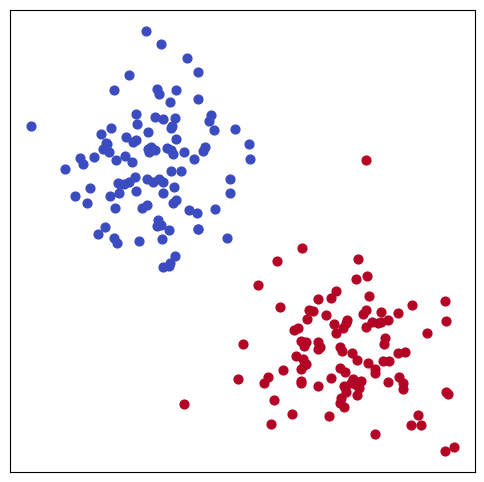

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
for i in np.unique(labels):
  ix = np.where(labels == i)
  ax.scatter(features[ix,0], features[ix,1], marker='o', s=40, color=plot_colors[i])

ax.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
            labelbottom=False,labeltop=False,labelleft=False,labelright=False);
ax.set(xlabel=None, ylabel=None)
plt.savefig('data.png', bbox_inches='tight', dpi=600)

# Perceptron algorithm

In [ ]:
# set weights to zero
w = np.ones(shape=(1, features.shape[1]+1)) * 0.5

misclassified_ = []
w_ = np.zeros((10,3))

for epoch in range(10):
  misclassified = 0
  w_[epoch,:]=w[0,:]

  for x, label in zip(features, labels):
      x = np.insert(x,0,1)
      y = np.dot(w, x.transpose())
      target = 1.0 if (y > 0) else 0.0

      delta = (label - target)
      if(delta): # misclassified
        misclassified += 1
        w += (delta * x)

  misclassified_.append(misclassified)

# Decision boundary plot

Evaluate the parameters of $w$ on a grid, for each $w$ updated by the perceptron algorithm.

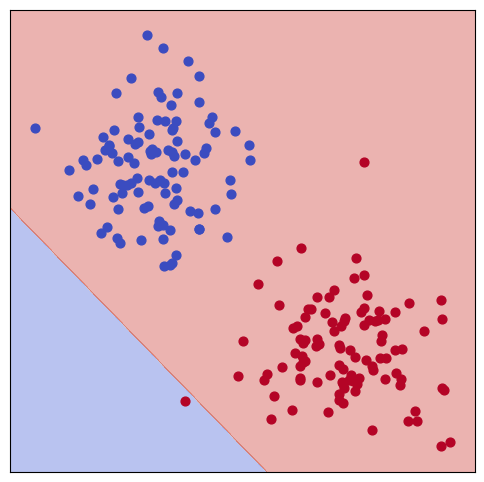

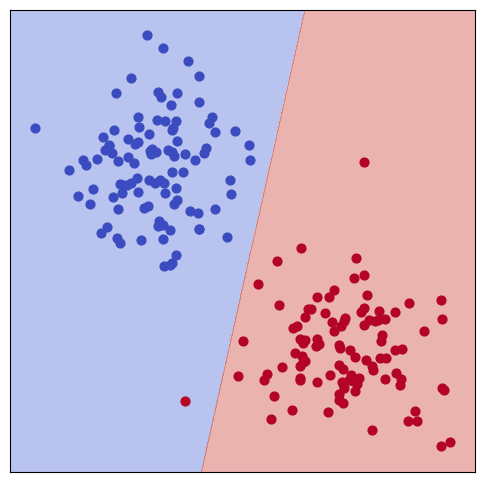

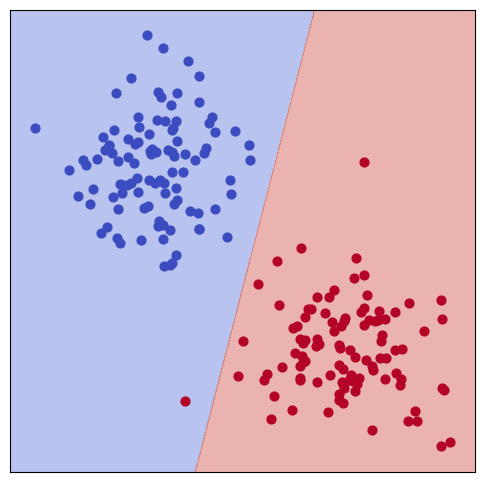

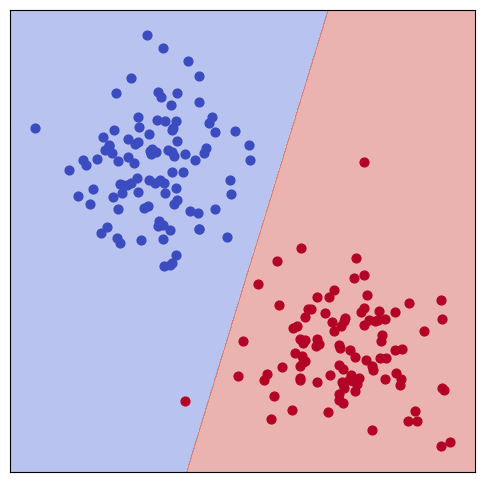

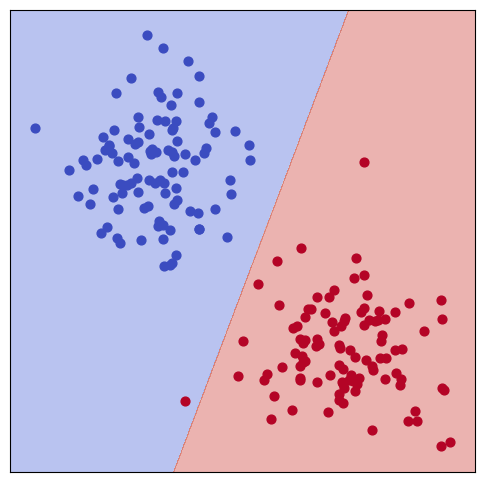

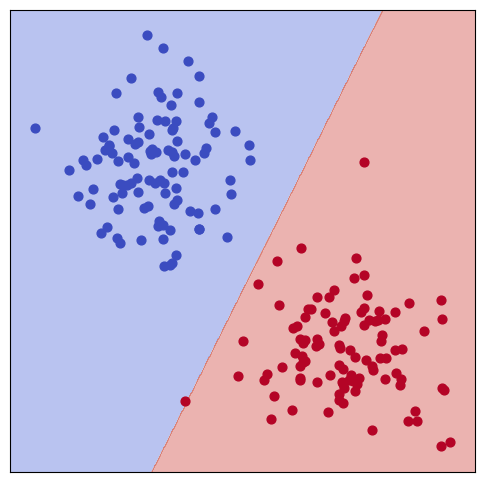

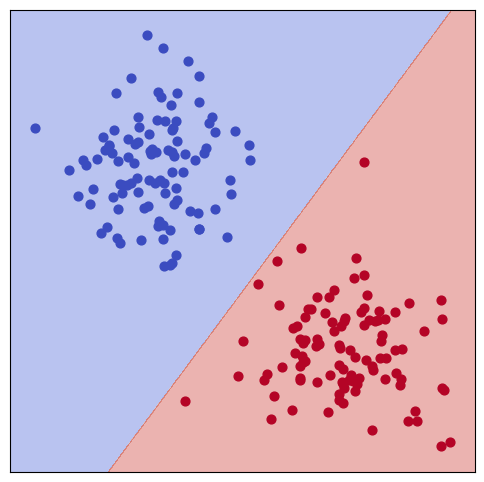

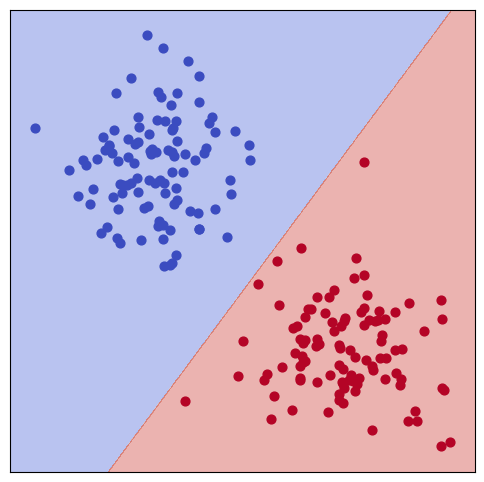

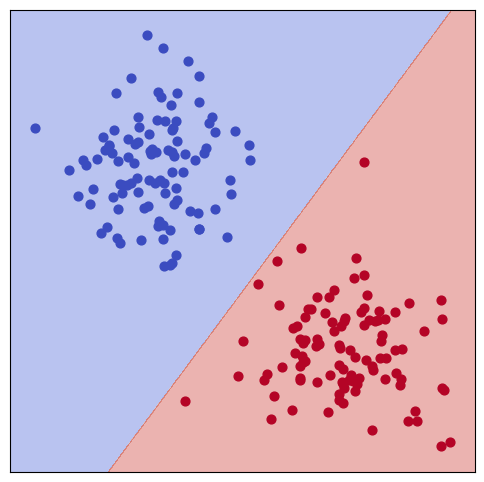

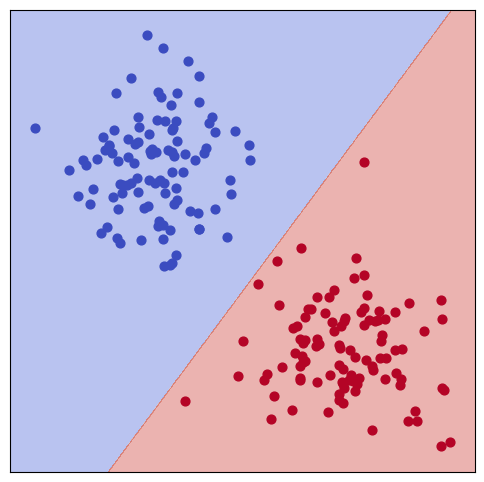

In [ ]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plot_mesh = np.c_[xx.ravel(), yy.ravel()]
plot_mesh = np.insert(plot_mesh,0,1,axis=1)

for j in range(w_.shape[0]):
  fig, ax = plt.subplots(figsize=(6,6))

  w_mesh = np.expand_dims(w_[j,:], axis=0)
  y = np.dot(w_mesh, plot_mesh.transpose())

  target = np.zeros_like(y)
  for i in range(y.shape[1]):
    target[0,i] = 1.0 if (y[0,i] > 0) else 0.0

  # Put the result into a color plot
  target = target.reshape(xx.shape)
  ax.contourf(xx, yy, target, cmap='coolwarm', alpha=0.4)


  for i in np.unique(labels):
    ix = np.where(labels == i)
    ax.scatter(features[ix,0], features[ix,1], marker='o', s=40, color=plot_colors[i])

  ax.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
              labelbottom=False,labeltop=False,labelleft=False,labelright=False);
  ax.set(xlabel=None, ylabel=None)

  # plt.show()
  plt.savefig('fit-plot-'+str(j)+'.png', bbox_inches='tight', dpi=600)

# Loss function based on the number of misclassified samples

A 3D plot for the cost function. Evaluate the classification of $X$ on a grid of estimated $a$ parameters. The $z$ dimension is the value of the cost function, which is defined as the number of misclassified samples:

$J(a)=\sum_{y \in \mathcal{Y}}(y)$

where $\mathcal{Y}(a)$ is the set of samples misclassified by $a$.

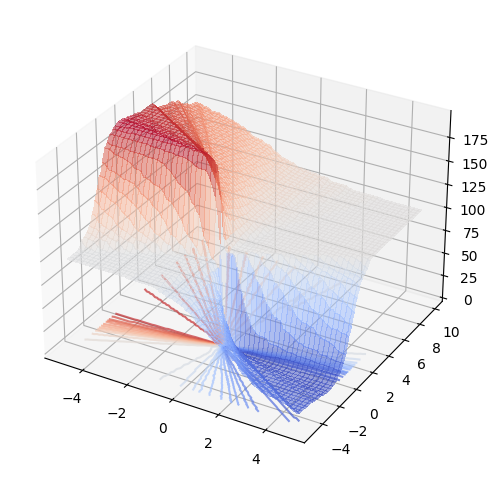

In [ ]:
h = .1  # step size in the mesh
theta0_grid, theta1_grid = np.meshgrid(np.arange(-5, 5, h),
                                       np.arange(-5, 10, h))

plot_mesh = np.c_[theta0_grid.ravel(), theta1_grid.ravel()]
features_mesh = np.insert(features,0,1,axis=1)

J = np.zeros((plot_mesh.shape[0],1))
for i in range(plot_mesh.shape[0]):
  w_mesh=np.array([[1,plot_mesh[i,0],plot_mesh[i,1]]])
  y = np.dot(w_mesh, features_mesh.transpose())
  y1 = np.where(y > 0, 1, y)
  y2 = np.where(y1 <= 0, 0, y1)
  J[i] = np.sum(np.abs(labels-y2))



fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
surf = ax.plot_surface(theta0_grid, theta1_grid, J.reshape(theta0_grid.shape), cmap='coolwarm', linewidth=0, antialiased=False, alpha=0.5)

ax.contour(theta0_grid, theta1_grid, J.reshape(theta0_grid.shape), zdir='z', offset=-0.5, cmap='coolwarm', levels=30, alpha=0.7)

plt.show()
# plt.savefig('sgd-plot-3D.png', bbox_inches='tight', dpi=600)

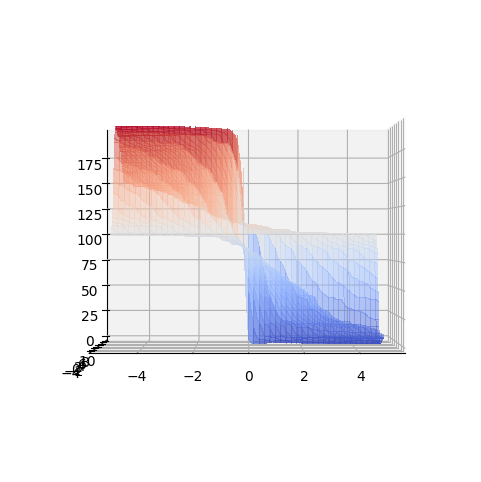

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
surf = ax.plot_surface(theta0_grid, theta1_grid, J.reshape(theta0_grid.shape), cmap='coolwarm', linewidth=0, antialiased=False, alpha=0.5)

ax.view_init(elev=0, azim=-90)
plt.show()

# Perceptron loss function

It turns out that the previous loss is a poor candidate for a gradient search because it is a peicewise constant function (i.e., there is no steepness). A better choice is the perceptron loss function, which is defined as follows:

$J_p(a)=\sum_{y \in \mathcal{Y}}(-a'y)$

where $\mathcal{Y}(a)$ is the set of samples misclassified by $a$.

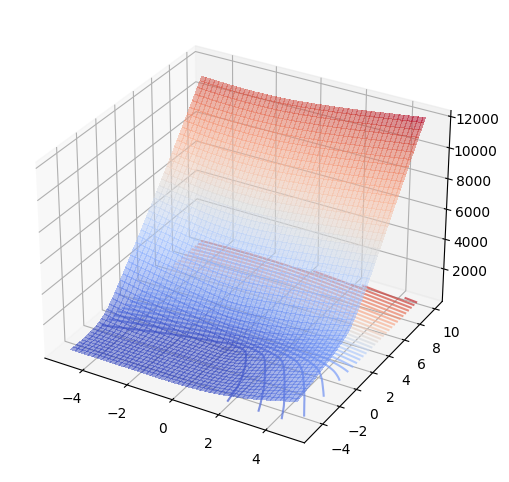

In [ ]:
h = .1  # step size in the mesh
theta0_grid, theta1_grid = np.meshgrid(np.arange(-5, 5, h),
                                       np.arange(-5, 10, h))

plot_mesh = np.c_[theta0_grid.ravel(), theta1_grid.ravel()]
features_mesh = np.insert(features,0,1,axis=1)

J = np.zeros((plot_mesh.shape[0],1))
for i in range(plot_mesh.shape[0]):
  w_mesh=np.array([[1,plot_mesh[i,0],plot_mesh[i,1]]])
  y = np.dot(w_mesh, features_mesh.transpose())
  # y1 = np.where(y > 0, 1, y)
  y2 = np.where(y <= 0, 0, y)
  J[i] = np.sum(np.abs(labels-y2))



fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
surf = ax.plot_surface(theta0_grid, theta1_grid, J.reshape(theta0_grid.shape), cmap='coolwarm', linewidth=0, antialiased=False, alpha=0.5)

ax.contour(theta0_grid, theta1_grid, J.reshape(theta0_grid.shape), zdir='z', offset=-0.5, cmap='coolwarm', levels=30, alpha=0.7)

plt.show()
# plt.savefig('sgd-plot-3D.png', bbox_inches='tight', dpi=600)

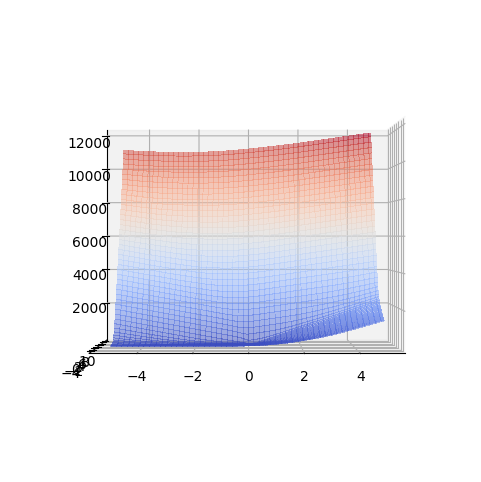

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
surf = ax.plot_surface(theta0_grid, theta1_grid, J.reshape(theta0_grid.shape), cmap='coolwarm', linewidth=0, antialiased=False, alpha=0.5)

ax.view_init(elev=0, azim=-90)
plt.show()

# Minimizing the cost function using stochastic gradient descent (SGD)
Plot the value of the cost function (i.e., the number of misclassified samples) for each $w$ updated by the perceptron algorithm.

<ipython-input-11-cffd460d0770>:4: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  ax.contour(theta0_grid, theta1_grid, J.reshape(theta0_grid.shape), zdir='z', offset=-0.5, cmap='coolwarm', levels=30, alpha=0.7)


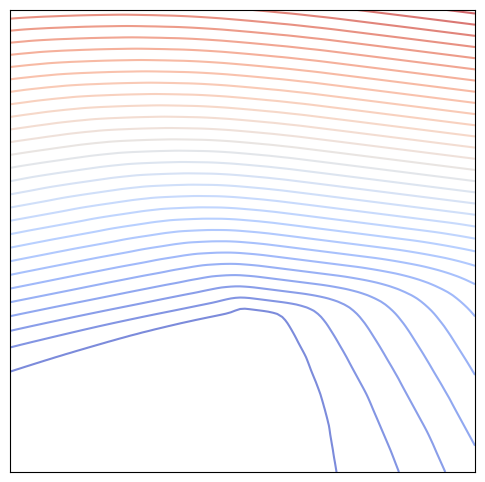

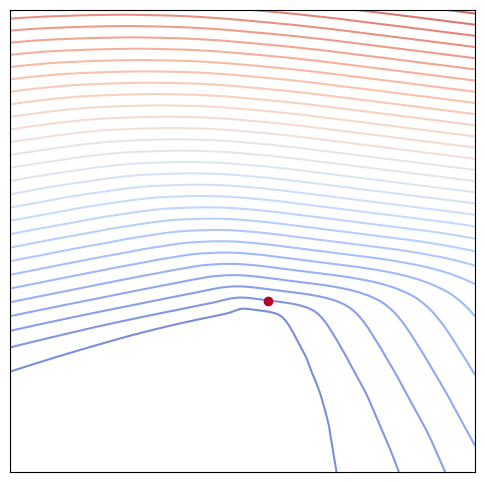

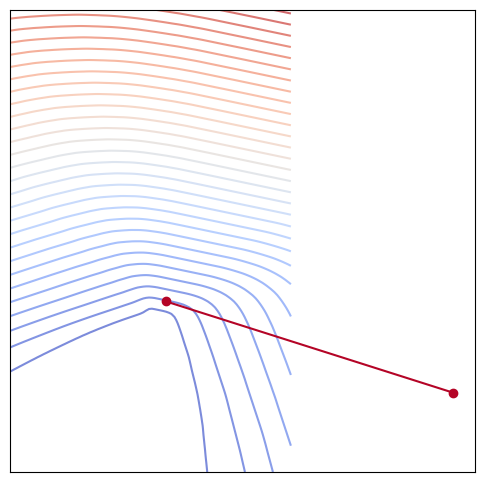

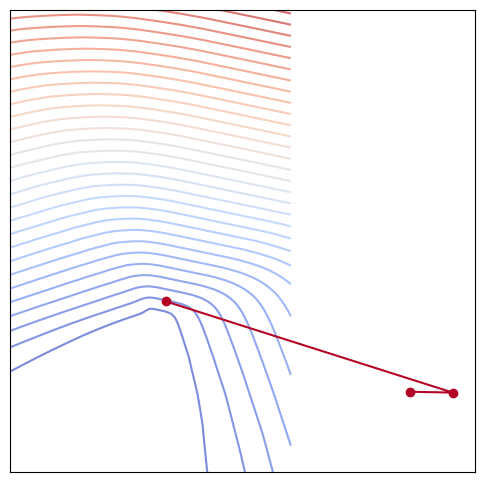

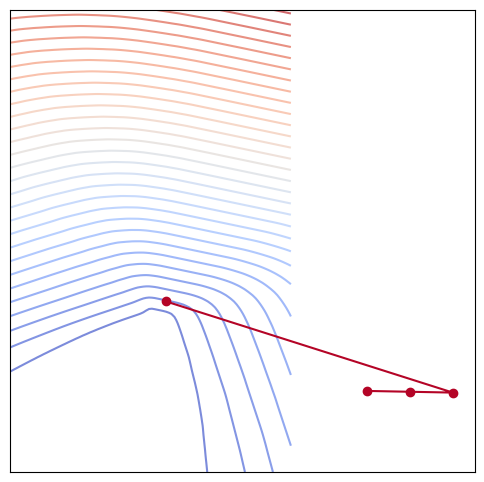

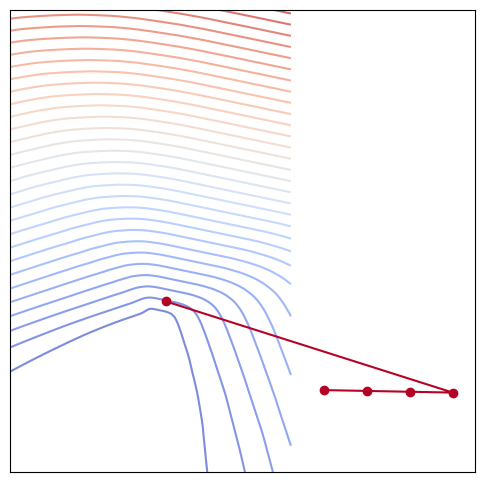

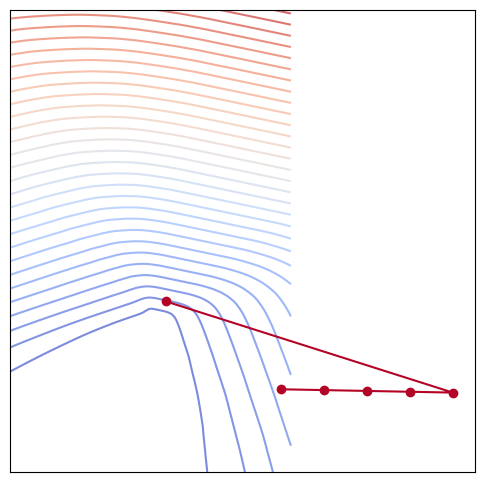

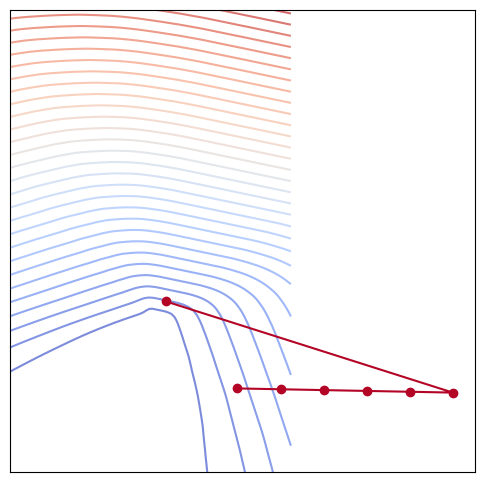

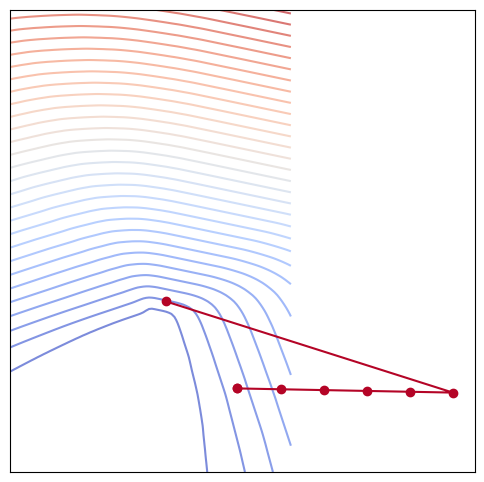

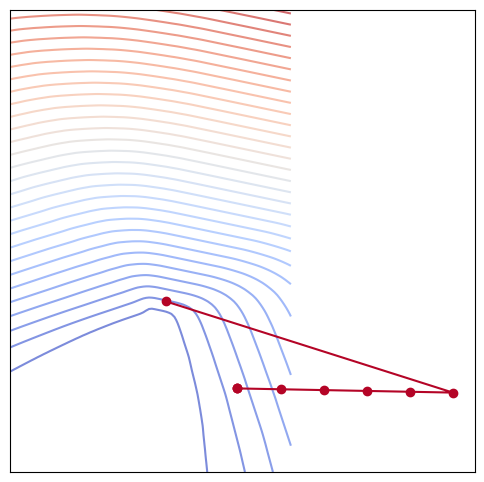

In [ ]:
for i in range(w_.shape[0]):

  fig, ax = plt.subplots(figsize=(6,6))
  ax.contour(theta0_grid, theta1_grid, J.reshape(theta0_grid.shape), zdir='z', offset=-0.5, cmap='coolwarm', levels=30, alpha=0.7)

  ax.plot(w_[:i,1], w_[:i,2], marker='o', color=plot_colors[1])
  ax.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
              labelbottom=False,labeltop=False,labelleft=False,labelright=False);
  ax.set(xlabel=None, ylabel=None)
  plt.show()
  # plt.savefig('sgd-plot-'+str(i)+'.png', bbox_inches='tight', dpi=600)